In [1]:
import os
import pandas as pd
import numpy as np

import ast

from fontTools.ttLib import TTFont
from fontTools.pens.svgPathPen import SVGPathPen

import svgpath2mpl
from svgpath2mpl import parse_path
from svgutils.compose import *

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches

In [2]:
fdir = '../ff/'
#os.listdir(fdir)
fnam = 'ff_c1.ttf'
font = TTFont(fdir+fnam)
# cmap = font.getBestCmap()
# cmap

In [3]:
with open('cdict1.txt') as f:
    data = f.read()
cdict = ast.literal_eval(data)
clist = list(cdict.keys())
#cdict['ū']

In [4]:
tdir = '../../Generative/chatgpt/'
tfil = '李雪遗传学研究_9.txt'
#sorted(os.listdir(tdir))
#
my_tfil = open(tdir+tfil, "r")
data = my_tfil.read()
my_tfil.close()
data = data.split("\n")
data = [d for d in data if d != "#"]
data = [d for d in data if d != "# ~~~~~~~~~~"]
#data
#
pind = [i for i in range(len(data)) if "# pg" in data[i]]
pages = [data[pind[ii]:pind[ii+1]] for ii in range(len(pind)-1)]
#pages[4]

In [5]:
for p in range(len(pages)):
    pp = p

In [6]:
pp = 4 ## set page
txts = pages[pp]
pg = [t for t in txts if "# pg" in t]
pg = pg[0].replace("# ","")
txts = [t for t in txts if "# pg" not in t]
txts

['她毕业后，',
 'Tā bìyè hòu,',
 '在一家研究所工作，',
 'zài yījiā yánjiū suǒ gōngzuò,',
 '继续深入研究遗传学。',
 'jìxù shēnrù yánjiū yíchuán xué.',
 'After she graduated,',
 'she worked at a research institute,',
 'continuing to study genetics in depth.',
 '李雪认为，',
 'Lǐ Xuě rènwéi,',
 '遗传学是',
 'yíchuán xué shì',
 '生物学的重要组成部分，',
 'shēngwù xué de zhòngyào zǔchéng bùfèn,',
 '能够解释',
 'nénggòu jiěshì',
 '生命的起源和演变。',
 'shēngmìng de qǐyuán hé yǎnbiàn.',
 'Li Xue believes',
 'genetics is',
 'an important part of biology,',
 'able to explain',
 'the origin and evolution of life.']

In [7]:
# size correction
# english, punctuation, pinyin, hanzi
csca = {
    "engl": 1,
    "punc": 1,
    "piny": 1,
    "hanz": 1.75,
}
csca["engl"]
#
tcs = []
ics = []
for x in range(len(txts)):
    txt = txts[x]
    tc = []
    ic = []
    for t in range(len(txt)):
        char = txt[t]
        charr = char.encode("unicode_escape")
        charr = str(charr)
        ctyp = ""
        if len(charr) <5:
            if char in clist: # English
                charrie = cdict[char]
                ctyp = "engl"
            else: # Common punctuation
                charrie = char
                ctyp = "punc"
        else:
            if char in clist: # Pinyin symbols
                charrie = cdict[char]                    
                ctyp = "piny"
            else: # Chinese characters
                charr = charr.replace("b'\\\\","'\\\\")
                charr = charr.replace("'","")
                charr = charr.replace("\\\\","")
                charr = charr.upper()
                charrie = charr.replace("U","uni")                  
                ctyp = "hanz"
        tc.append(csca[ctyp])
        ic.append(charrie)
    tcs.append(tc)
    ics.append(ic)

0


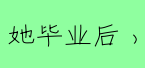

1


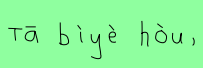

2


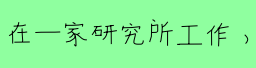

3


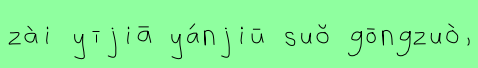

4


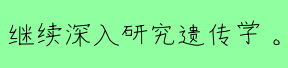

5


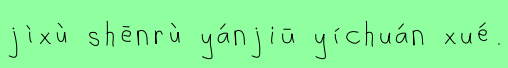

6


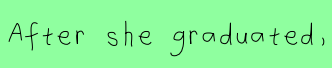

7


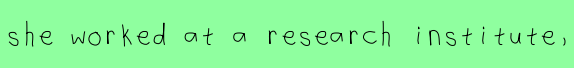

8


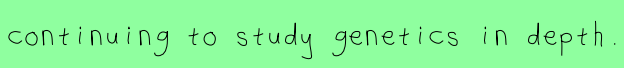

9


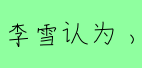

10


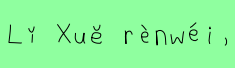

11


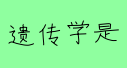

12


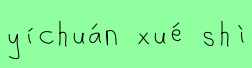

13


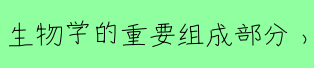

In [ ]:
for x in range(len(txts)):
    if x >= 0: # use for subset
        #x = 14
        print(x)
        txt = txts[x]
        # txt='Nǐ hǎo, nǐ zěnme yàng'
        # txt
        sca = 1
        gpx = 10
        gpy = 10
#         print("len:")
#         print(len(txt))
#         print(sum(tcs[x]))
        fig, axs = plt.subplots(1, 
                                len(txt), 
                                figsize=((sum(tcs[x])*sca)/4, sca))
        for t in range(len(txt)):
            char = txt[t]
            charrie = ics[x][t]
            #
            if char != ' ': # Handle spaces
                glyphSet = font.getGlyphSet()
                svgpen = SVGPathPen(glyphSet)
                glyph = glyphSet[charrie]
                #
                glyph.draw(svgpen)
                cpath = svgpen.getCommands()
                cpath = cpath.replace('Z','') # replace 'Z' = 'closepath'
                #cpath
                #
                pcpath = svgpath2mpl.parse_path(cpath)
                vv = pcpath.vertices
                vdf = pd.DataFrame(vv)
                vxmi = vdf[0].min()
                vxma = vdf[0].max()
                vymi = vdf[1].min()
                vyma = vdf[1].max()
                #
                #
                patch = mpl.patches.PathPatch(
                    pcpath, 
                    facecolor='none', 
                    edgecolor='black', 
                    linewidth=1)
                patch.set_transform(axs[t].transData)
                axs[t].add_patch(patch)
                axs[t].set_aspect(1)
                axs[t].axis("off")
                axs[t].set_xticklabels([])
                axs[t].set_yticklabels([])
                axs[t].set_xlim([vxmi-50, vxma+50])
                axs[t].set_ylim([-350, 1100])
            else: # space character
                axs[t].set_aspect(1)
                axs[t].axis("off")
                axs[t].set_xlim([0, 400])
                axs[t].set_ylim([-350, 1100])
        #
        fig.subplots_adjust(left=0, wspace=0, hspace=0)
        fig.patch.set_facecolor('xkcd:mint green')
        plt.savefig("out/phidia3/"+pg+"_l"+str(x)+".svg")
        plt.show()

In [ ]:
txts[5]

In [ ]:
#txt[7]

In [ ]:
# concatenate page text
#
spp = pg
svgs = sorted(os.listdir('./out/phidia3/'))
svgs = [s for s in svgs if spp in s]
#
s_p0 = 'Figure("0.4cm", "0.4cm",' # not actually cm
s_p1 = 'Panel(SVG("out/phidia3/'
s_p2 = '").scale(0.025)), '
s_pn = ').tile(1,'+str(len(svgs))+').save("out/phidia3/'+spp+'_stack.svg")'
#
s_pl = []
s_pl.append(s_p0)
for s in svgs:
    s_pl.append(s_p1+s+s_p2)
s_pl.append(s_pn)
#
sfun = ''.join(s_pl)
eval(sfun)